# Comparison of NGCAS vs. galSVM results on a single image

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=2)
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('../catalogs/all_merged.txt', delim_whitespace=True)
datann = pd.read_csv('../catalogs/all_merged_nonoise.txt', delim_whitespace=True)

In [3]:
def plot_galsvm_vs_iraf_noiseless(param, lims, title=None):
    iraf_param = param + '_iraf'
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot([-5, 5], [-5, 5], 'k', alpha=0.1)
    ax.plot(data[param], data[iraf_param], '.b', alpha=0.7, label='original')
    ax.plot(datann[param], datann[iraf_param], '.r', alpha=0.5, label='noiseless')
    ax.legend(loc='best')
    ax.set_xlabel('galSVM')
    ax.set_ylabel('IRAF')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    if title:
        plt.title(title)

## Sub selection of galaxies by properties

In [8]:
def plot_galsvm_vs_iraf(param, lims, cuts, labels, title=None, data=data):
    iraf_param = param + '_iraf'
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot([-5, 5], [-5, 5], 'k', alpha=0.1)
    ax.plot(data[param][cuts[0]], data[iraf_param][cuts[0]], '.b', alpha=0.7, label=labels[0])
    ax.plot(data[param][cuts[1]], data[iraf_param][cuts[1]], '.g', alpha=0.7, label=labels[1])
    ax.plot(data[param][cuts[2]], data[iraf_param][cuts[2]], '.r', alpha=0.7, label=labels[2])
    ax.legend(loc='best')
    ax.set_xlabel('galSVM')
    ax.set_ylabel('IRAF')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    if title:
        plt.title(title)

### B/T (bulge to total ratio)

In [5]:
def plot_vs_bt(param, lims, title=None):
    low = data.bt < 0.2
    mid = (data.bt > 0.2) & (data.bt < 0.7)
    high = data.bt > 0.7
    
    low_label='B/T < 0.2'
    mid_label='0.2 < B/T < 0.7'
    high_label='B/T > 0.7'
    
    cuts = [low, mid, high]
    labels = [low_label, mid_label, high_label]
    
    if title:
        title += ' vs B/T'
    plot_galsvm_vs_iraf(param, lims, cuts, labels, title=title)

### Total magnitude

In [6]:
def plot_vs_mag(param, lims, title=None):
    low = (data.mag > 21) & (data.mag <= 22)
    mid = (data.mag > 22) & (data.mag <= 23)
    high = (data.mag > 23) & (data.mag <= 24)

    low_label='21 < M < 22'
    mid_label='22 < M < 23'
    high_label='23 < M < 24'

    cuts = [low, mid, high]
    labels = [low_label, mid_label, high_label]
    
    if title:
        title += ' vs magnitude'
    plot_galsvm_vs_iraf(param, lims, cuts, labels, title=title)

### Disk radius

In [7]:
def plot_vs_radius(param, lims, title=None):
    fwhm = 0.2  # in arcseconds
    low = data.disk_radius <= fwhm
    mid = (data.disk_radius > fwhm) & (data.disk_radius <= 3*fwhm)
    high = data.disk_radius > 3*fwhm
    
    low_label='disk_rad < FWHM'
    mid_label='FWHM < disk_rad < 3 FWHM'
    high_label='disk_rad > 3 FWHM'

    cuts = [low, mid, high]
    labels = [low_label, mid_label, high_label]
    
    if title:
        title += ' vs disk radius'
    plot_galsvm_vs_iraf(param, lims, cuts, labels, title=title)

### Bulge radius

In [8]:
def plot_vs_bulge(param, lims, title=None):
    fwhm = 0.2  # in arcseconds
    low = data.bulge_radius <= fwhm
    mid = (data.bulge_radius > fwhm) & (data.bulge_radius <= 3*fwhm)
    high = data.bulge_radius > 3*fwhm
    
    low_label='bulge_rad < FWHM'
    mid_label='FWHM < bulge_rad < 3 FWHM'
    high_label='bulge_rad > 3 FWHM'

    cuts = [low, mid, high]
    labels = [low_label, mid_label, high_label]
    
    if title:
        title += ' vs bulge radius'
    plot_galsvm_vs_iraf(param, lims, cuts, labels, title=title)

### IRAF `Petr` radius on noiseless data

In [6]:
def plot_vs_petr(param, lims, title=None):
    low = datann.Petr <= 7
    mid = (datann.Petr > 7) & (datann.Petr <= 14)
    high = datann.Petr > 14
    
    low_label='petr < 7'
    mid_label='7 < petr < 14'
    high_label='petr > 14'

    cuts = [low, mid, high]
    labels = [low_label, mid_label, high_label]
    
    if title:
        title += ' vs bulge radius'
    plot_galsvm_vs_iraf(param, lims, cuts, labels, title=title, data=datann)

## Gini index

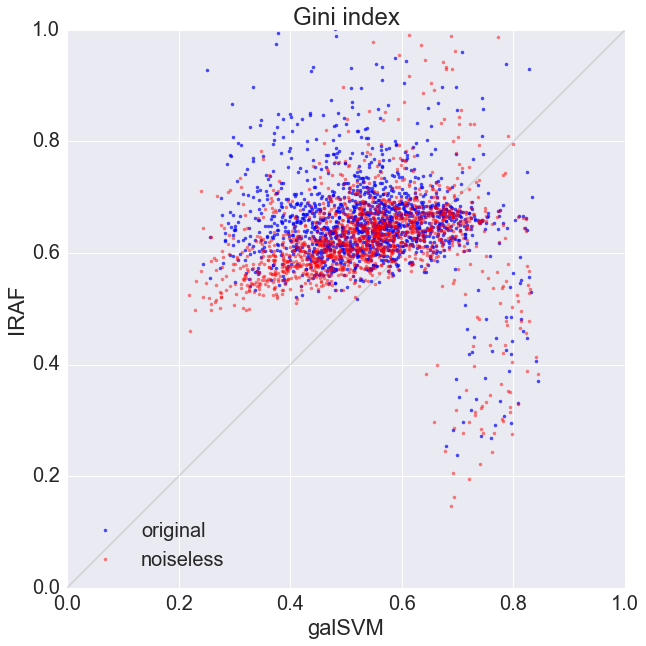

In [9]:
plot_galsvm_vs_iraf_noiseless('gini', [0, 1], title='Gini index')

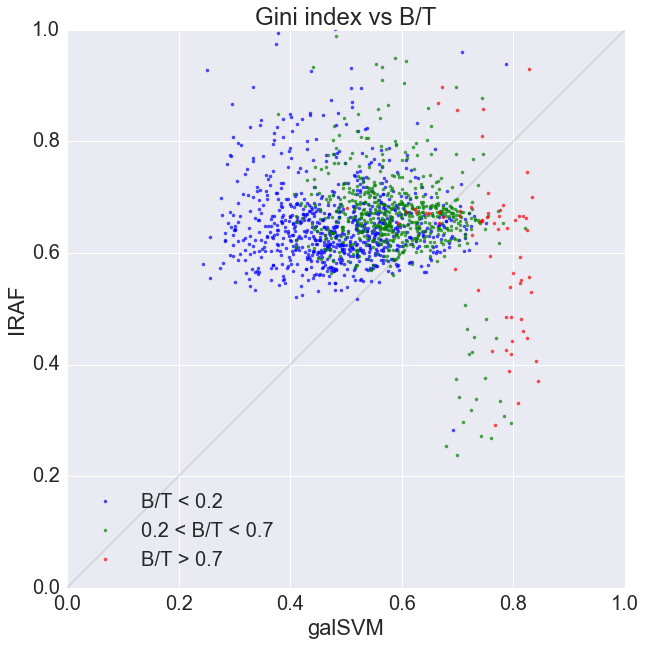

In [10]:
plot_vs_bt('gini', [0, 1], title='Gini index')

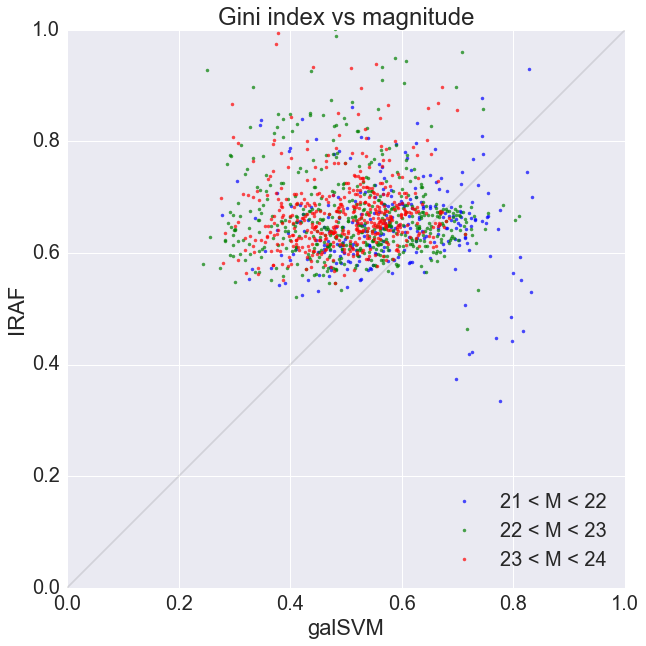

In [11]:
plot_vs_mag('gini', [0, 1], title='Gini index')

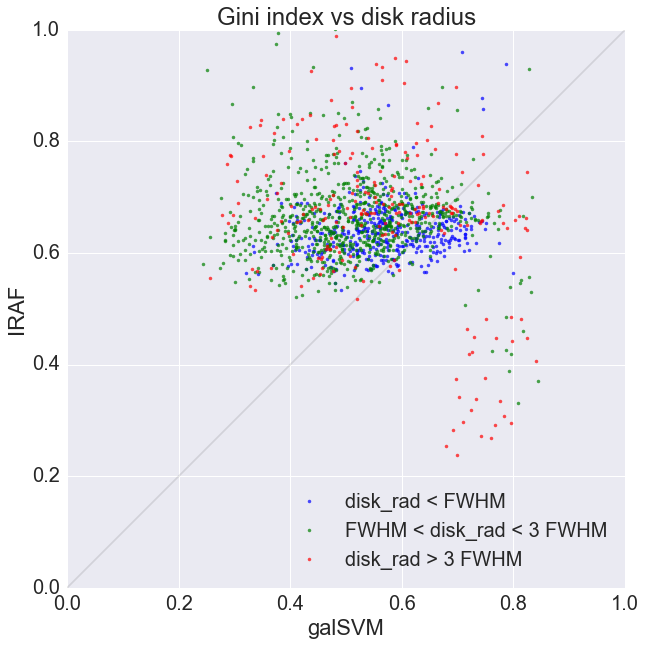

In [12]:
plot_vs_radius('gini', [0, 1], title='Gini index')

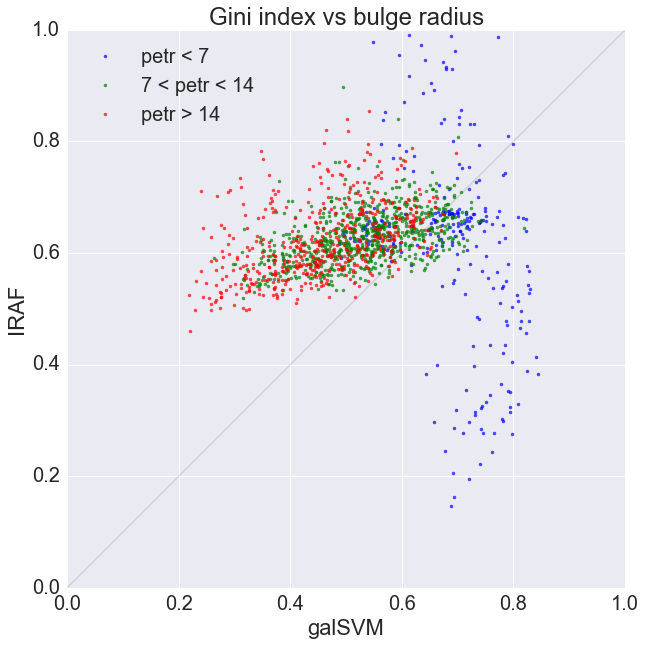

In [9]:
plot_vs_petr('gini', [0, 1], title='Gini index')

### $M_{20}$

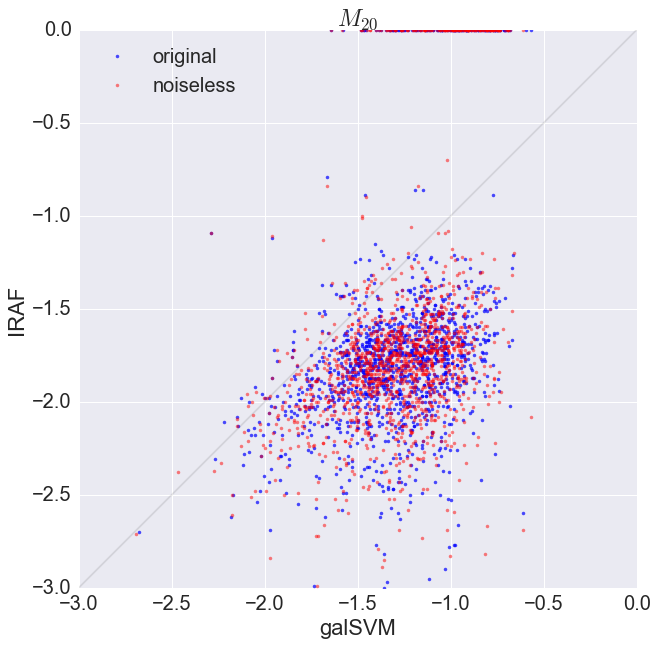

In [13]:
plot_galsvm_vs_iraf_noiseless('m20', [-3, 0], title=r'$M_{20}$')

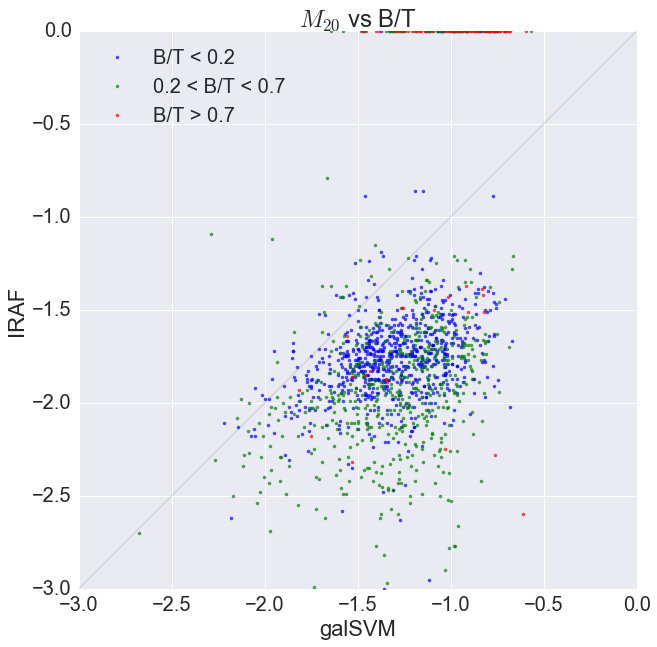

In [14]:
plot_vs_bt('m20', [-3, 0], title=r'$M_{20}$')

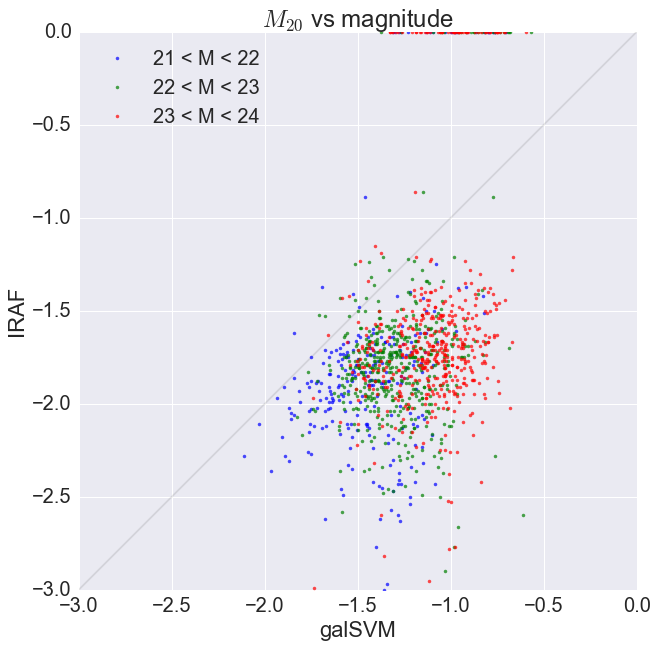

In [15]:
plot_vs_mag('m20', [-3, 0], title=r'$M_{20}$')

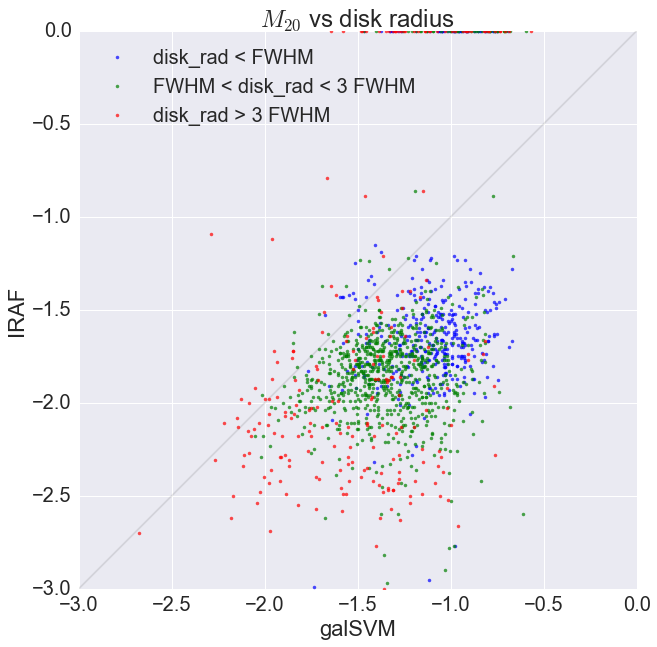

In [16]:
plot_vs_radius('m20', [-3, 0], title=r'$M_{20}$')

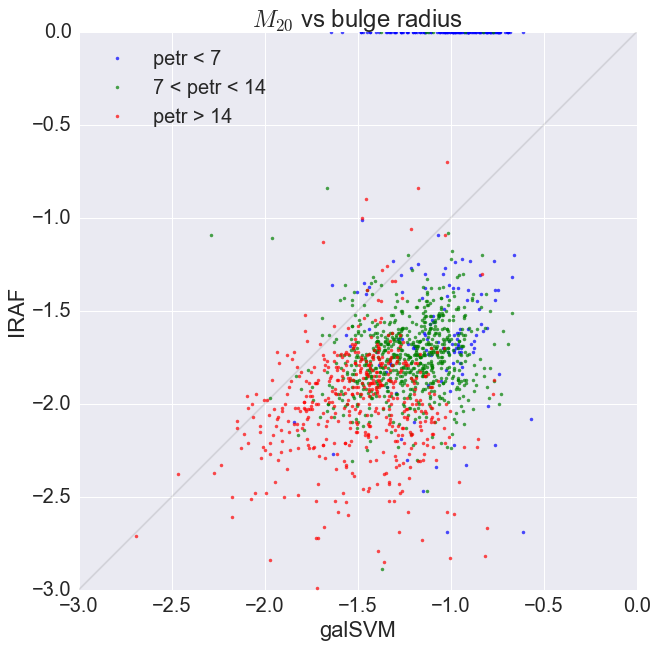

In [10]:
plot_vs_petr('m20', [-3, 0], title=r'$M_{20}$')

## Concentration

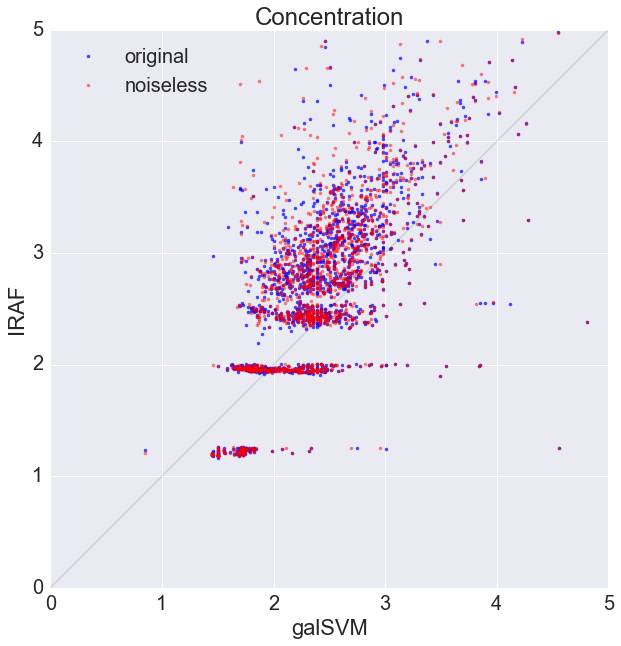

In [17]:
plot_galsvm_vs_iraf_noiseless('c', [0, 5], title='Concentration')

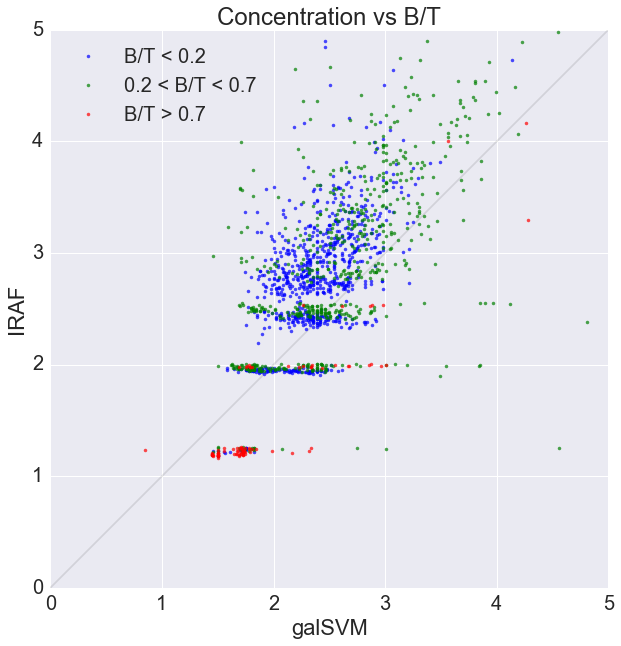

In [18]:
plot_vs_bt('c', [0, 5], title='Concentration')

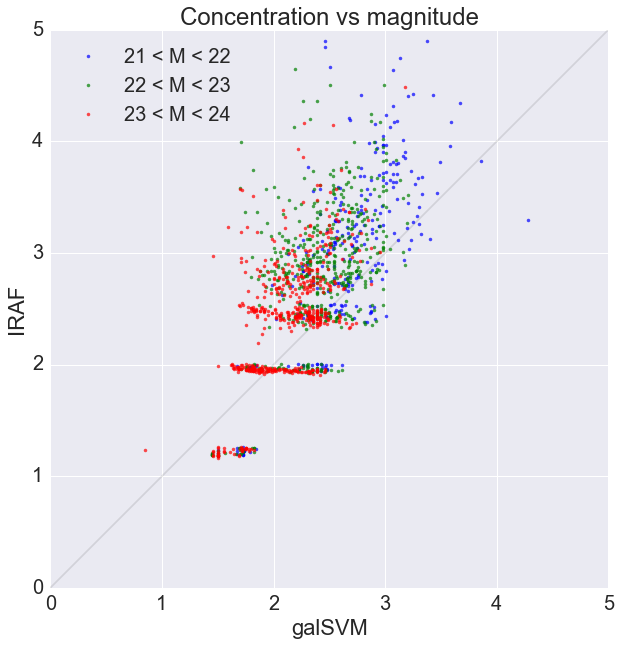

In [19]:
plot_vs_mag('c', [0, 5], title='Concentration')

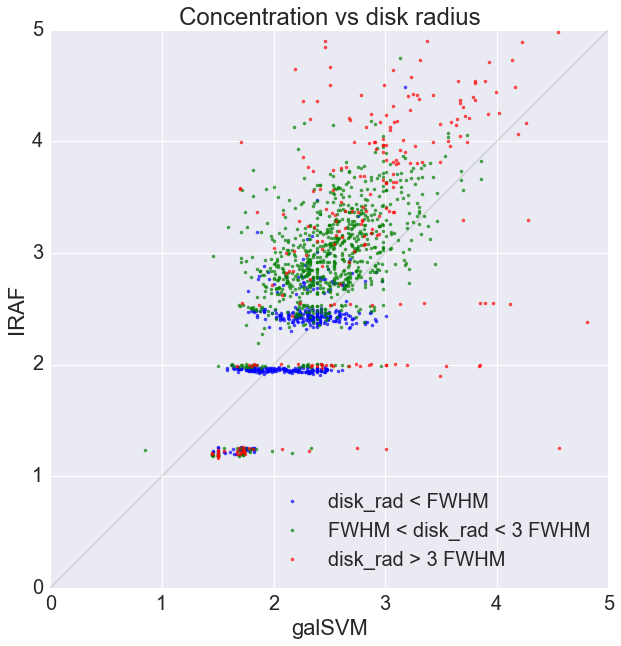

In [20]:
plot_vs_radius('c', [0, 5], title='Concentration')

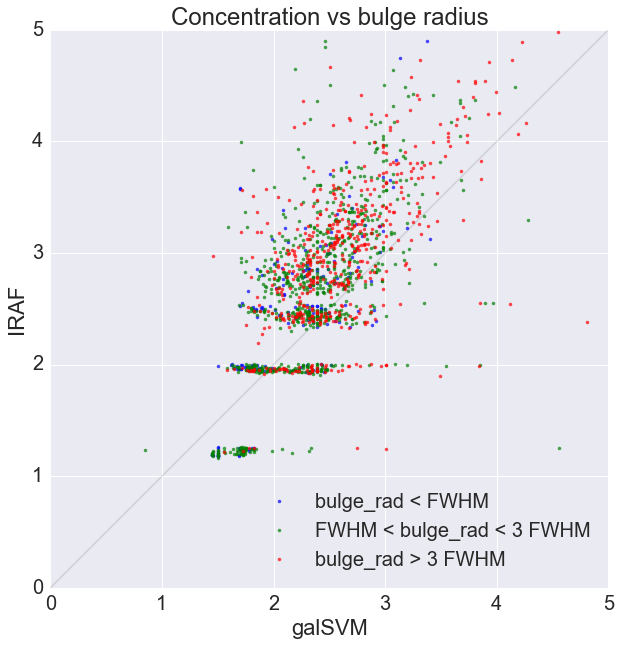

In [21]:
plot_vs_bulge('c', [0, 5], title='Concentration')

## Asymmetry

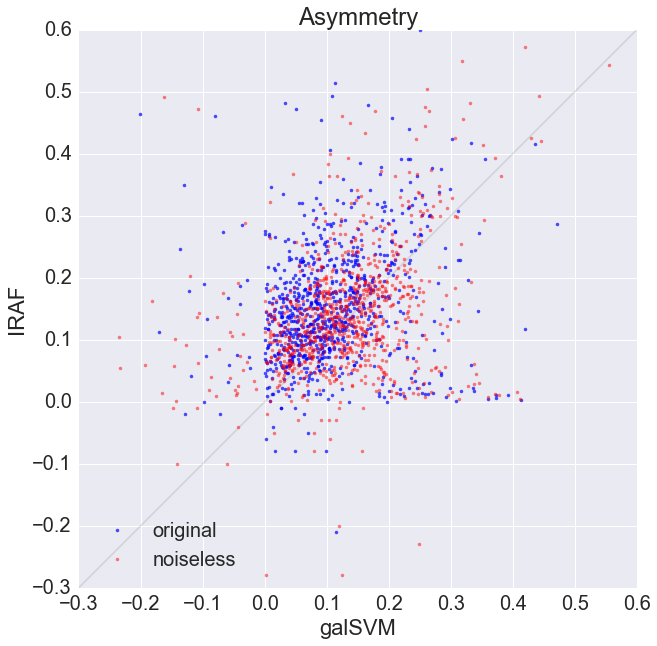

In [22]:
plot_galsvm_vs_iraf_noiseless('a', [-0.3, 0.6], title='Asymmetry')

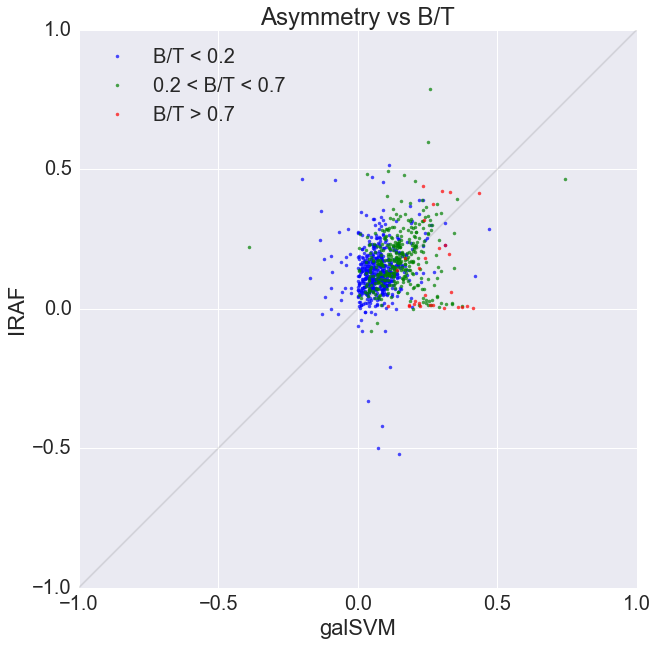

In [23]:
plot_vs_bt('a', [-1, 1], title='Asymmetry')

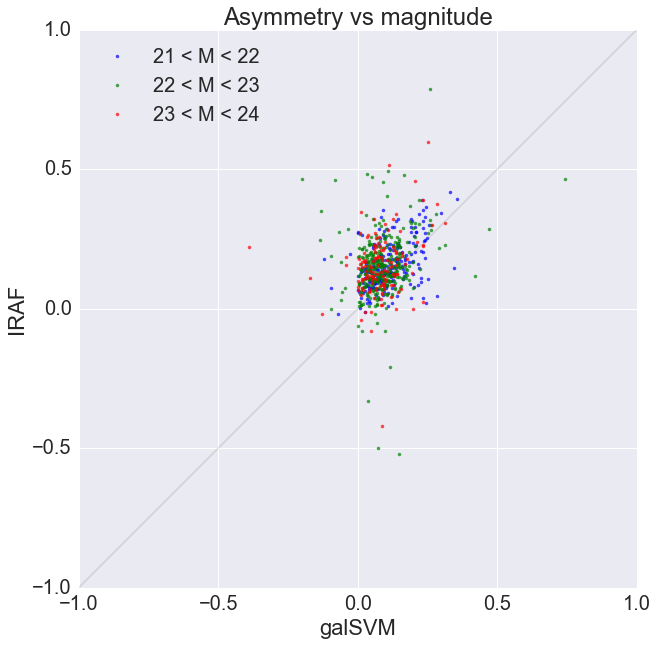

In [24]:
plot_vs_mag('a', [-1, 1], title='Asymmetry')

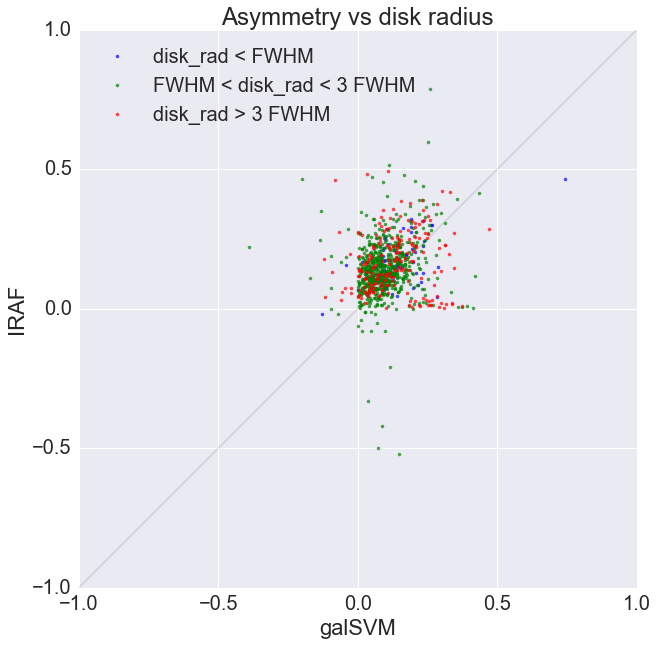

In [25]:
plot_vs_radius('a', [-1, 1], title='Asymmetry')

## Smoothness

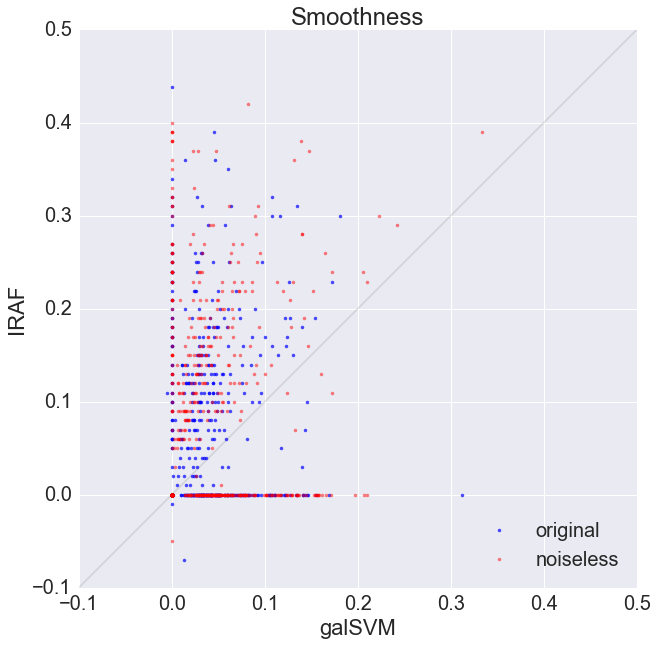

In [26]:
plot_galsvm_vs_iraf_noiseless('s', [-0.1, 0.5], title='Smoothness')

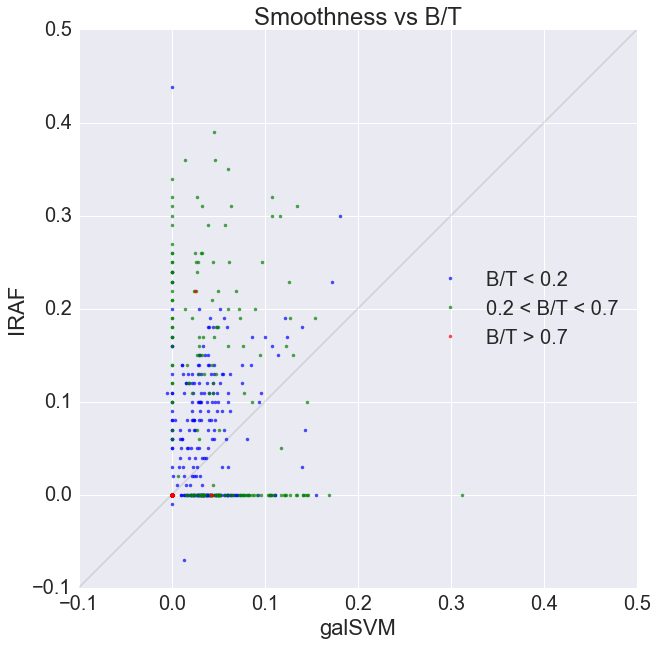

In [27]:
plot_vs_bt('s', [-0.1, 0.5], title='Smoothness')

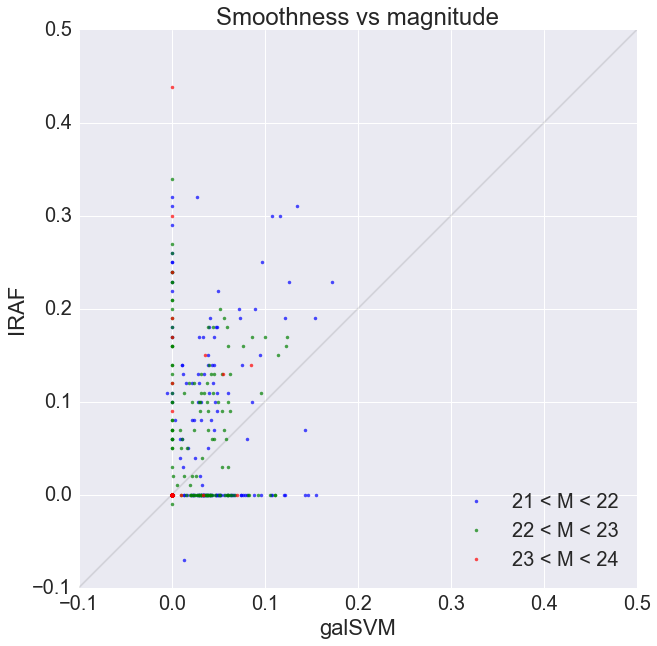

In [28]:
plot_vs_mag('s', [-0.1, 0.5], title='Smoothness')

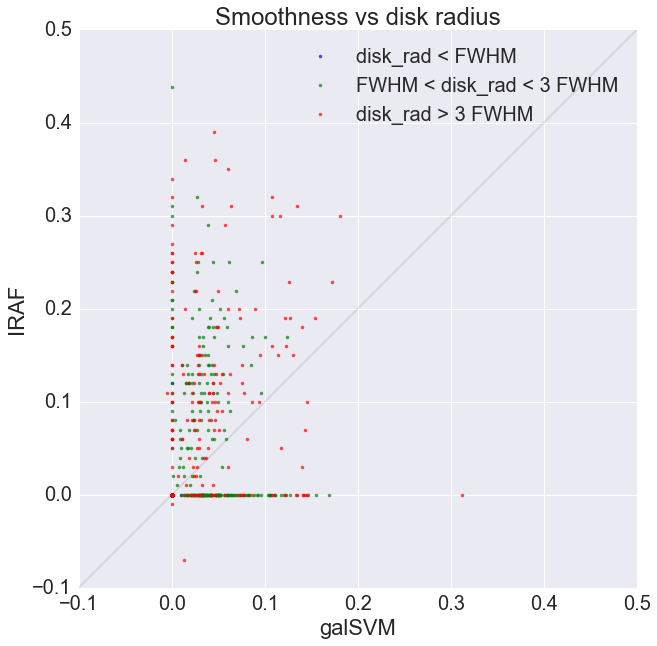

In [29]:
plot_vs_radius('s', [-0.1, 0.5], title='Smoothness')

## Concentration vs. concentration d'Abraham

(0, 1)

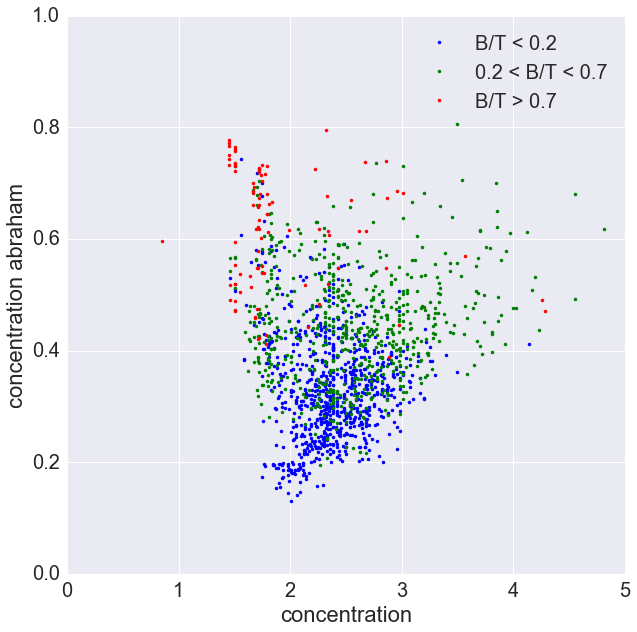

In [30]:
low = data.bt < 0.2
mid = (data.bt > 0.2) & (data.bt < 0.7)
high = data.bt > 0.7

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data[low].c, data[low].c_abr, '.b', label='B/T < 0.2')
ax.plot(data[mid].c, data[mid].c_abr, '.g', label='0.2 < B/T < 0.7')
ax.plot(data[high].c, data[high].c_abr, '.r', label='B/T > 0.7')
ax.legend(loc='best')
ax.set_xlabel('concentration')
ax.set_ylabel('concentration abraham')
ax.set_xlim(0, 5)
ax.set_ylim(0, 1)

In [31]:
good = data.a < 80

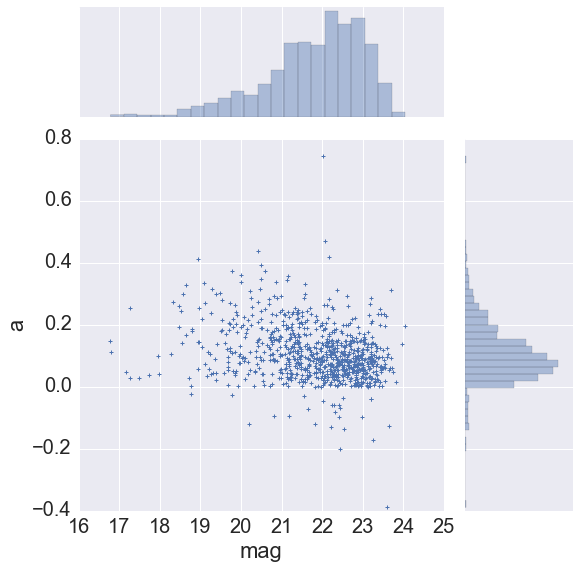

In [32]:
sb.jointplot(x='mag', y='a', data=data[good], stat_func=None, 
             s=10, linewidth=1, marker='+',
             size=8, ratio=3)

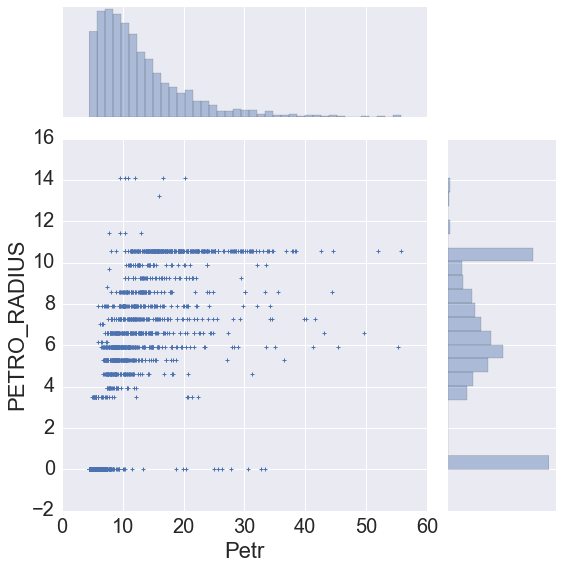

In [5]:
sb.jointplot(x='Petr', y='PETRO_RADIUS', data=datann, 
             stat_func=None,
             s=10, linewidth=1, marker='+',
             size=8, ratio=3)